In [1]:
# Import required libraries
%pip install optuna
import pandas as pd
import numpy as np
import os, random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
import optuna

# For models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Set constant seed for reproducibility + deterministic settings
SEED = 42
os.environ['PYTHONHASHSEED'] = str(SEED)
os.environ['TF_DETERMINISTIC_OPS'] = '1'
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'
random.seed(SEED)
np.random.seed(SEED)
# Remove optuna.seed(SEED) as it does not exist


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


/Users/shreyasshah/Desktop/Fall_2025/STA 221/ecs221/.venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Downgrade numpy for TensorFlow compatibility (run this cell and restart kernel)
%pip install numpy==1.26.4


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
# Load dataset and select top 14 features
features = [
    'RiskScore', 'MonthlyCharges', 'AvgChargesPerMonth', 'ContractRisk', 'Contract',
    'TotalServices', 'TotalCharges', 'EstimatedCLV', 'HasFamily', 'tenure',
    'Partner', 'HighValueCustomer', 'PaymentRisk', 'Dependents'
]
df = pd.read_csv('final_telco_engineered.csv')
X = df[features]
# Assuming target column is 'Churn' (update if different)
y = df['Churn']

In [4]:
# Identify categorical and numerical columns for preprocessing
categorical_cols = ['Contract', 'HasFamily', 'Partner', 'HighValueCustomer', 'Dependents']
numerical_cols = [col for col in features if col not in categorical_cols]

# Preprocessing pipeline
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_cols),
    ('cat', OneHotEncoder(drop='first'), categorical_cols)
])

In [5]:
# Train/validation/test split (80/10/10)
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.10, random_state=SEED, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.1111, random_state=SEED, stratify=y_temp)
# 0.1111 * 0.90 ≈ 0.10

In [6]:
# Ensure target variable is numeric (0/1)
if y_train.dtype == 'O' or y_train.dtype.name == 'category':
    y_train = y_train.map({'No': 0, 'Yes': 1}).astype(int)
    y_val = y_val.map({'No': 0, 'Yes': 1}).astype(int)
    y_test = y_test.map({'No': 0, 'Yes': 1}).astype(int)

In [7]:
# Fit preprocessor and transform data
X_train_proc = preprocessor.fit_transform(X_train)
X_val_proc = preprocessor.transform(X_val)
X_test_proc = preprocessor.transform(X_test)


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


/Users/shreyasshah/Desktop/Fall_2025/STA 221/ecs221/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
[I 2025-11-21 16:40:21,704] A new study created in memory with name: no-name-af58f76c-cdb9-4432-8cb7-99566ddc7ed3
  0%|          | 0/50 [00:00<?, ?it/s]2025-11-21 16:40:21.724349: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2025-11-21 16:40:21.724383: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2025-11-21 16:40:21.724394: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2025-11-21 16:40:21.724413: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-11-21 16

Early stopping at epoch 9; best val F1=0.6444
Trial early stopped at epoch 9 (best val F1=0.6444)
[I 2025-11-21 16:40:31,233] Trial 0 finished with value: 0.6443514644351465 and parameters: {'n_units': 58, 'lr': 0.007969454818643935, 'dropout': 0.36599697090570255, 'batch_size': 90}. Best is trial 0 with value: 0.6443514644351465.


Best trial: 0. Best value: 0.644351:   4%|▍         | 2/50 [00:28<11:56, 14.92s/it]

Early stopping at epoch 22; best val F1=0.6386
Trial early stopped at epoch 22 (best val F1=0.6386)
[I 2025-11-21 16:40:49,928] Trial 1 finished with value: 0.6385542168674698 and parameters: {'n_units': 33, 'lr': 0.00020511104188433984, 'dropout': 0.02904180608409973, 'batch_size': 116}. Best is trial 0 with value: 0.6443514644351465.


Best trial: 0. Best value: 0.644351:   6%|▌         | 3/50 [00:35<09:02, 11.55s/it]

Early stopping at epoch 8; best val F1=0.6440
Trial early stopped at epoch 8 (best val F1=0.6440)
[I 2025-11-21 16:40:57,477] Trial 2 finished with value: 0.644 and parameters: {'n_units': 83, 'lr': 0.0026070247583707684, 'dropout': 0.010292247147901223, 'batch_size': 126}. Best is trial 0 with value: 0.6443514644351465.


Best trial: 3. Best value: 0.644898:   8%|▊         | 4/50 [00:57<11:54, 15.53s/it]

Early stopping at epoch 14; best val F1=0.6449
Trial early stopped at epoch 14 (best val F1=0.6449)
[I 2025-11-21 16:41:19,104] Trial 3 finished with value: 0.6448979591836734 and parameters: {'n_units': 110, 'lr': 0.00026587543983272726, 'dropout': 0.09091248360355031, 'batch_size': 49}. Best is trial 3 with value: 0.6448979591836734.


Best trial: 4. Best value: 0.646217:  10%|█         | 5/50 [01:14<12:12, 16.28s/it]

Early stopping at epoch 12; best val F1=0.6462
Trial early stopped at epoch 12 (best val F1=0.6462)
[I 2025-11-21 16:41:36,707] Trial 4 finished with value: 0.6462167689161554 and parameters: {'n_units': 50, 'lr': 0.0011207606211860567, 'dropout': 0.21597250932105788, 'batch_size': 60}. Best is trial 4 with value: 0.6462167689161554.


Best trial: 4. Best value: 0.646217:  12%|█▏        | 6/50 [01:37<13:27, 18.35s/it]

Early stopping at epoch 15; best val F1=0.6433
Trial early stopped at epoch 15 (best val F1=0.6433)
[I 2025-11-21 16:41:59,078] Trial 5 finished with value: 0.643298969072165 and parameters: {'n_units': 85, 'lr': 0.00019010245319870352, 'dropout': 0.14607232426760908, 'batch_size': 67}. Best is trial 4 with value: 0.6462167689161554.


Best trial: 6. Best value: 0.646341:  14%|█▍        | 7/50 [01:52<12:28, 17.40s/it]

Early stopping at epoch 12; best val F1=0.6463
Trial early stopped at epoch 12 (best val F1=0.6463)
[I 2025-11-21 16:42:14,530] Trial 6 finished with value: 0.6463414634146342 and parameters: {'n_units': 67, 'lr': 0.0037183641805732083, 'dropout': 0.09983689107917987, 'batch_size': 81}. Best is trial 6 with value: 0.6463414634146342.


Best trial: 6. Best value: 0.646341:  16%|█▌        | 8/50 [02:23<15:14, 21.77s/it]

Early stopping at epoch 22; best val F1=0.6327
Trial early stopped at epoch 22 (best val F1=0.6327)
[I 2025-11-21 16:42:45,666] Trial 7 finished with value: 0.6326530612244898 and parameters: {'n_units': 82, 'lr': 0.0001238513729886094, 'dropout': 0.3037724259507192, 'batch_size': 48}. Best is trial 6 with value: 0.6463414634146342.


Best trial: 6. Best value: 0.646341:  18%|█▊        | 9/50 [02:44<14:38, 21.43s/it]

Early stopping at epoch 26; best val F1=0.6416
Trial early stopped at epoch 26 (best val F1=0.6416)
[I 2025-11-21 16:43:06,338] Trial 8 finished with value: 0.6415841584158416 and parameters: {'n_units': 23, 'lr': 0.007902619549708232, 'dropout': 0.4828160165372797, 'batch_size': 110}. Best is trial 6 with value: 0.6463414634146342.


Best trial: 6. Best value: 0.646341:  20%|██        | 10/50 [03:16<16:25, 24.64s/it]

[I 2025-11-21 16:43:38,179] Trial 9 finished with value: 0.6328600405679513 and parameters: {'n_units': 50, 'lr': 0.0001567993391672301, 'dropout': 0.34211651325607845, 'batch_size': 74}. Best is trial 6 with value: 0.6463414634146342.


Best trial: 10. Best value: 0.649087:  22%|██▏       | 11/50 [03:33<14:30, 22.33s/it]

Early stopping at epoch 15; best val F1=0.6491
Trial early stopped at epoch 15 (best val F1=0.6491)
[I 2025-11-21 16:43:55,267] Trial 10 finished with value: 0.6490872210953347 and parameters: {'n_units': 122, 'lr': 0.0025838500351805663, 'dropout': 0.1843643863605487, 'batch_size': 94}. Best is trial 10 with value: 0.6490872210953347.


Best trial: 11. Best value: 0.651822:  24%|██▍       | 12/50 [03:48<12:46, 20.18s/it]

Early stopping at epoch 11; best val F1=0.6518
Trial early stopped at epoch 11 (best val F1=0.6518)
[I 2025-11-21 16:44:10,510] Trial 11 finished with value: 0.6518218623481782 and parameters: {'n_units': 121, 'lr': 0.00265905234824859, 'dropout': 0.18813380983104294, 'batch_size': 92}. Best is trial 11 with value: 0.6518218623481782.


Best trial: 11. Best value: 0.651822:  26%|██▌       | 13/50 [04:02<11:11, 18.14s/it]

Early stopping at epoch 12; best val F1=0.6466
Trial early stopped at epoch 12 (best val F1=0.6466)
[I 2025-11-21 16:44:23,972] Trial 12 finished with value: 0.6465863453815262 and parameters: {'n_units': 126, 'lr': 0.001230138670601933, 'dropout': 0.22541305037492282, 'batch_size': 95}. Best is trial 11 with value: 0.6518218623481782.


Best trial: 11. Best value: 0.651822:  28%|██▊       | 14/50 [04:13<09:35, 15.98s/it]

Early stopping at epoch 9; best val F1=0.6426
Trial early stopped at epoch 9 (best val F1=0.6426)
[I 2025-11-21 16:44:34,955] Trial 13 finished with value: 0.642570281124498 and parameters: {'n_units': 106, 'lr': 0.0026620776228169075, 'dropout': 0.1712579968688783, 'batch_size': 99}. Best is trial 11 with value: 0.6518218623481782.


Best trial: 11. Best value: 0.651822:  30%|███       | 15/50 [04:35<10:26, 17.89s/it]

Early stopping at epoch 24; best val F1=0.6490
Trial early stopped at epoch 24 (best val F1=0.6490)
[I 2025-11-21 16:44:57,287] Trial 14 finished with value: 0.6489795918367347 and parameters: {'n_units': 127, 'lr': 0.0005138902732321327, 'dropout': 0.2638459379148994, 'batch_size': 105}. Best is trial 11 with value: 0.6518218623481782.


Best trial: 11. Best value: 0.651822:  32%|███▏      | 16/50 [04:54<10:22, 18.32s/it]

Early stopping at epoch 17; best val F1=0.6477
Trial early stopped at epoch 17 (best val F1=0.6477)
[I 2025-11-21 16:45:16,583] Trial 15 finished with value: 0.6476578411405295 and parameters: {'n_units': 105, 'lr': 0.0038861039680790996, 'dropout': 0.15351560778228468, 'batch_size': 89}. Best is trial 11 with value: 0.6518218623481782.


Best trial: 11. Best value: 0.651822:  34%|███▍      | 17/50 [05:09<09:30, 17.30s/it]

Early stopping at epoch 12; best val F1=0.6449
Trial early stopped at epoch 12 (best val F1=0.6449)
[I 2025-11-21 16:45:31,517] Trial 16 finished with value: 0.6448979591836734 and parameters: {'n_units': 113, 'lr': 0.0016650394048724727, 'dropout': 0.3963210549539139, 'batch_size': 80}. Best is trial 11 with value: 0.6518218623481782.


Best trial: 17. Best value: 0.655738:  36%|███▌      | 18/50 [05:35<10:29, 19.67s/it]

Early stopping at epoch 12; best val F1=0.6557
Trial early stopped at epoch 12 (best val F1=0.6557)
[I 2025-11-21 16:45:56,714] Trial 17 finished with value: 0.6557377049180327 and parameters: {'n_units': 97, 'lr': 0.0006429663057107977, 'dropout': 0.28181588027938126, 'batch_size': 38}. Best is trial 17 with value: 0.6557377049180327.


Best trial: 17. Best value: 0.655738:  38%|███▊      | 19/50 [06:16<13:30, 26.15s/it]

Early stopping at epoch 17; best val F1=0.6489
Trial early stopped at epoch 17 (best val F1=0.6489)
[I 2025-11-21 16:46:37,969] Trial 18 finished with value: 0.648870636550308 and parameters: {'n_units': 99, 'lr': 0.0005541754977604228, 'dropout': 0.43557324544598053, 'batch_size': 35}. Best is trial 17 with value: 0.6557377049180327.


Best trial: 17. Best value: 0.655738:  40%|████      | 20/50 [06:52<14:38, 29.29s/it]

Early stopping at epoch 15; best val F1=0.6504
Trial early stopped at epoch 15 (best val F1=0.6504)
[I 2025-11-21 16:47:14,557] Trial 19 finished with value: 0.6504065040650406 and parameters: {'n_units': 92, 'lr': 0.0006404597986997009, 'dropout': 0.28735929254830955, 'batch_size': 32}. Best is trial 17 with value: 0.6557377049180327.


Best trial: 17. Best value: 0.655738:  42%|████▏     | 21/50 [07:36<16:17, 33.70s/it]

Early stopping at epoch 30; best val F1=0.6544
Trial early stopped at epoch 30 (best val F1=0.6544)
[I 2025-11-21 16:47:58,550] Trial 20 finished with value: 0.65439672801636 and parameters: {'n_units': 117, 'lr': 0.00033406708872320105, 'dropout': 0.32015020996676435, 'batch_size': 60}. Best is trial 17 with value: 0.6557377049180327.


Best trial: 17. Best value: 0.655738:  44%|████▍     | 22/50 [08:25<17:46, 38.08s/it]

Early stopping at epoch 29; best val F1=0.6489
Trial early stopped at epoch 29 (best val F1=0.6489)
[I 2025-11-21 16:48:46,833] Trial 21 finished with value: 0.648870636550308 and parameters: {'n_units': 118, 'lr': 0.00031711593664388103, 'dropout': 0.32089598385612667, 'batch_size': 50}. Best is trial 17 with value: 0.6557377049180327.


Best trial: 17. Best value: 0.655738:  46%|████▌     | 23/50 [08:40<14:00, 31.12s/it]

Early stopping at epoch 9; best val F1=0.6477
Trial early stopped at epoch 9 (best val F1=0.6477)
[I 2025-11-21 16:49:01,728] Trial 22 finished with value: 0.6476578411405295 and parameters: {'n_units': 99, 'lr': 0.0007936502303286459, 'dropout': 0.2516307200200894, 'batch_size': 59}. Best is trial 17 with value: 0.6557377049180327.


Best trial: 17. Best value: 0.655738:  48%|████▊     | 24/50 [09:18<14:29, 33.45s/it]

Early stopping at epoch 21; best val F1=0.6503
Trial early stopped at epoch 21 (best val F1=0.6503)
[I 2025-11-21 16:49:40,624] Trial 23 finished with value: 0.6503067484662577 and parameters: {'n_units': 116, 'lr': 0.00035349915537677184, 'dropout': 0.38257464313609973, 'batch_size': 41}. Best is trial 17 with value: 0.6557377049180327.


Best trial: 17. Best value: 0.655738:  50%|█████     | 25/50 [10:01<15:07, 36.31s/it]

Early stopping at epoch 26; best val F1=0.6517
Trial early stopped at epoch 26 (best val F1=0.6517)
[I 2025-11-21 16:50:23,582] Trial 24 finished with value: 0.6517311608961304 and parameters: {'n_units': 97, 'lr': 0.000373381356517262, 'dropout': 0.22688233618168568, 'batch_size': 44}. Best is trial 17 with value: 0.6557377049180327.


Best trial: 17. Best value: 0.655738:  52%|█████▏    | 26/50 [10:28<13:19, 33.33s/it]

Early stopping at epoch 17; best val F1=0.6492
Trial early stopped at epoch 17 (best val F1=0.6492)
[I 2025-11-21 16:50:49,966] Trial 25 finished with value: 0.6491935483870968 and parameters: {'n_units': 76, 'lr': 0.001727699495348881, 'dropout': 0.28638768774588164, 'batch_size': 58}. Best is trial 17 with value: 0.6557377049180327.


Best trial: 17. Best value: 0.655738:  54%|█████▍    | 27/50 [10:47<11:06, 28.96s/it]

Early stopping at epoch 13; best val F1=0.6490
Trial early stopped at epoch 13 (best val F1=0.6490)
[I 2025-11-21 16:51:08,739] Trial 26 finished with value: 0.6489795918367347 and parameters: {'n_units': 107, 'lr': 0.000775619302280255, 'dropout': 0.41476120003504646, 'batch_size': 69}. Best is trial 17 with value: 0.6557377049180327.


Best trial: 17. Best value: 0.655738:  56%|█████▌    | 28/50 [11:07<09:38, 26.29s/it]

Early stopping at epoch 14; best val F1=0.6462
Trial early stopped at epoch 14 (best val F1=0.6462)
[I 2025-11-21 16:51:28,800] Trial 27 finished with value: 0.6462167689161554 and parameters: {'n_units': 128, 'lr': 0.0004371993126708942, 'dropout': 0.3455037344969722, 'batch_size': 77}. Best is trial 17 with value: 0.6557377049180327.


Best trial: 17. Best value: 0.655738:  58%|█████▊    | 29/50 [11:22<08:05, 23.12s/it]

Early stopping at epoch 10; best val F1=0.6385
Trial early stopped at epoch 10 (best val F1=0.6385)
[I 2025-11-21 16:51:44,506] Trial 28 finished with value: 0.638477801268499 and parameters: {'n_units': 89, 'lr': 0.005827324646020773, 'dropout': 0.11884849383054877, 'batch_size': 66}. Best is trial 17 with value: 0.6557377049180327.


Best trial: 17. Best value: 0.655738:  60%|██████    | 30/50 [11:39<07:01, 21.06s/it]

Early stopping at epoch 11; best val F1=0.6466
Trial early stopped at epoch 11 (best val F1=0.6466)
[I 2025-11-21 16:52:00,784] Trial 29 finished with value: 0.6465863453815262 and parameters: {'n_units': 117, 'lr': 0.001524176783121479, 'dropout': 0.19273298776953177, 'batch_size': 86}. Best is trial 17 with value: 0.6557377049180327.


Best trial: 17. Best value: 0.655738:  62%|██████▏   | 31/50 [12:31<09:40, 30.54s/it]

Early stopping at epoch 29; best val F1=0.6379
Trial early stopped at epoch 29 (best val F1=0.6379)
[I 2025-11-21 16:52:53,418] Trial 30 finished with value: 0.6378600823045267 and parameters: {'n_units': 61, 'lr': 0.00010312100034618213, 'dropout': 0.36398982925838164, 'batch_size': 39}. Best is trial 17 with value: 0.6557377049180327.


Best trial: 17. Best value: 0.655738:  64%|██████▍   | 32/50 [13:15<10:20, 34.47s/it]

Early stopping at epoch 24; best val F1=0.6517
Trial early stopped at epoch 24 (best val F1=0.6517)
[I 2025-11-21 16:53:37,060] Trial 31 finished with value: 0.6517311608961304 and parameters: {'n_units': 99, 'lr': 0.0003893687262824468, 'dropout': 0.22655541458599499, 'batch_size': 41}. Best is trial 17 with value: 0.6557377049180327.


Best trial: 17. Best value: 0.655738:  66%|██████▌   | 33/50 [13:33<08:21, 29.48s/it]

Early stopping at epoch 10; best val F1=0.6382
Trial early stopped at epoch 10 (best val F1=0.6382)
[I 2025-11-21 16:53:54,912] Trial 32 finished with value: 0.6382113821138211 and parameters: {'n_units': 94, 'lr': 0.00027186307173177266, 'dropout': 0.2567297087338762, 'batch_size': 55}. Best is trial 17 with value: 0.6557377049180327.


Best trial: 17. Best value: 0.655738:  68%|██████▊   | 34/50 [14:04<07:58, 29.93s/it]

Early stopping at epoch 17; best val F1=0.6491
Trial early stopped at epoch 17 (best val F1=0.6491)
[I 2025-11-21 16:54:25,899] Trial 33 finished with value: 0.6490872210953347 and parameters: {'n_units': 76, 'lr': 0.0007625057765672773, 'dropout': 0.31990303186408, 'batch_size': 45}. Best is trial 17 with value: 0.6557377049180327.


Best trial: 17. Best value: 0.655738:  70%|███████   | 35/50 [14:39<07:53, 31.54s/it]

Early stopping at epoch 23; best val F1=0.6503
Trial early stopped at epoch 23 (best val F1=0.6503)
[I 2025-11-21 16:55:01,188] Trial 34 finished with value: 0.6503067484662577 and parameters: {'n_units': 112, 'lr': 0.00021962953374018358, 'dropout': 0.05854117658759614, 'batch_size': 53}. Best is trial 17 with value: 0.6557377049180327.


Best trial: 17. Best value: 0.655738:  72%|███████▏  | 36/50 [14:56<06:22, 27.29s/it]

Early stopping at epoch 18; best val F1=0.6517
Trial early stopped at epoch 18 (best val F1=0.6517)
[I 2025-11-21 16:55:18,552] Trial 35 finished with value: 0.6517311608961304 and parameters: {'n_units': 102, 'lr': 0.000957962386419348, 'dropout': 0.20972087493564218, 'batch_size': 126}. Best is trial 17 with value: 0.6557377049180327.


Best trial: 17. Best value: 0.655738:  74%|███████▍  | 37/50 [15:17<05:28, 25.25s/it]

Early stopping at epoch 21; best val F1=0.6403
Trial early stopped at epoch 21 (best val F1=0.6403)
[I 2025-11-21 16:55:39,051] Trial 36 finished with value: 0.6403326403326404 and parameters: {'n_units': 121, 'lr': 0.00025386214149904636, 'dropout': 0.27585271534498546, 'batch_size': 117}. Best is trial 17 with value: 0.6557377049180327.


Best trial: 17. Best value: 0.655738:  76%|███████▌  | 38/50 [15:55<05:48, 29.01s/it]

Early stopping at epoch 29; best val F1=0.6518
Trial early stopped at epoch 29 (best val F1=0.6518)
[I 2025-11-21 16:56:16,816] Trial 37 finished with value: 0.6518218623481782 and parameters: {'n_units': 109, 'lr': 0.00018714467267577138, 'dropout': 0.13889382778931383, 'batch_size': 64}. Best is trial 17 with value: 0.6557377049180327.


Best trial: 17. Best value: 0.655738:  78%|███████▊  | 39/50 [16:30<05:39, 30.82s/it]

[I 2025-11-21 16:56:51,881] Trial 38 finished with value: 0.6474226804123712 and parameters: {'n_units': 111, 'lr': 0.00016371552150981224, 'dropout': 0.030416484409082928, 'batch_size': 74}. Best is trial 17 with value: 0.6557377049180327.


Best trial: 17. Best value: 0.655738:  80%|████████  | 40/50 [16:56<04:53, 29.36s/it]

Early stopping at epoch 17; best val F1=0.6354
Trial early stopped at epoch 17 (best val F1=0.6354)
[I 2025-11-21 16:57:17,825] Trial 39 finished with value: 0.6354378818737271 and parameters: {'n_units': 87, 'lr': 0.00012709827640107542, 'dropout': 0.13353153074227675, 'batch_size': 62}. Best is trial 17 with value: 0.6557377049180327.


Best trial: 17. Best value: 0.655738:  82%|████████▏ | 41/50 [17:31<04:40, 31.13s/it]

Early stopping at epoch 30; best val F1=0.6504
Trial early stopped at epoch 30 (best val F1=0.6504)
[I 2025-11-21 16:57:53,097] Trial 40 finished with value: 0.6504065040650406 and parameters: {'n_units': 47, 'lr': 0.00021395801720528105, 'dropout': 0.1596825100483254, 'batch_size': 84}. Best is trial 17 with value: 0.6557377049180327.


Best trial: 17. Best value: 0.655738:  84%|████████▍ | 42/50 [17:57<03:56, 29.62s/it]

Early stopping at epoch 14; best val F1=0.6504
Trial early stopped at epoch 14 (best val F1=0.6504)
[I 2025-11-21 16:58:19,187] Trial 41 finished with value: 0.6504065040650406 and parameters: {'n_units': 93, 'lr': 0.0004658272337041948, 'dropout': 0.07629210070146254, 'batch_size': 45}. Best is trial 17 with value: 0.6557377049180327.


Best trial: 17. Best value: 0.655738:  86%|████████▌ | 43/50 [18:19<03:11, 27.29s/it]

Early stopping at epoch 16; best val F1=0.6433
Trial early stopped at epoch 16 (best val F1=0.6433)
[I 2025-11-21 16:58:41,040] Trial 42 finished with value: 0.643298969072165 and parameters: {'n_units': 109, 'lr': 0.00028250862861138414, 'dropout': 0.23819940751746888, 'batch_size': 65}. Best is trial 17 with value: 0.6557377049180327.


Best trial: 17. Best value: 0.655738:  88%|████████▊ | 44/50 [18:47<02:46, 27.70s/it]

Early stopping at epoch 18; best val F1=0.6545
Trial early stopped at epoch 18 (best val F1=0.6545)
[I 2025-11-21 16:59:09,711] Trial 43 finished with value: 0.6544715447154471 and parameters: {'n_units': 121, 'lr': 0.0006083905685238038, 'dropout': 0.20025738079046906, 'batch_size': 53}. Best is trial 17 with value: 0.6557377049180327.


Best trial: 17. Best value: 0.655738:  90%|█████████ | 45/50 [19:10<02:11, 26.26s/it]

Early stopping at epoch 17; best val F1=0.6452
Trial early stopped at epoch 17 (best val F1=0.6452)
[I 2025-11-21 16:59:32,596] Trial 44 finished with value: 0.6451612903225806 and parameters: {'n_units': 122, 'lr': 0.0006116128200102987, 'dropout': 0.10908623252613521, 'batch_size': 70}. Best is trial 17 with value: 0.6557377049180327.


Best trial: 17. Best value: 0.655738:  92%|█████████▏| 46/50 [19:28<01:35, 23.75s/it]

Early stopping at epoch 9; best val F1=0.6433
Trial early stopped at epoch 9 (best val F1=0.6433)
[I 2025-11-21 16:59:50,503] Trial 45 finished with value: 0.643298969072165 and parameters: {'n_units': 116, 'lr': 0.002203418855780056, 'dropout': 0.20977969252893136, 'batch_size': 49}. Best is trial 17 with value: 0.6557377049180327.


Best trial: 17. Best value: 0.655738:  94%|█████████▍| 47/50 [19:49<01:08, 22.81s/it]

Early stopping at epoch 12; best val F1=0.6518
Trial early stopped at epoch 12 (best val F1=0.6518)
[I 2025-11-21 17:00:11,123] Trial 46 finished with value: 0.6518218623481782 and parameters: {'n_units': 122, 'lr': 0.0011449369631943694, 'dropout': 0.1856217673910498, 'batch_size': 55}. Best is trial 17 with value: 0.6557377049180327.


Best trial: 17. Best value: 0.655738:  96%|█████████▌| 48/50 [20:03<00:40, 20.28s/it]

Early stopping at epoch 8; best val F1=0.6287
Trial early stopped at epoch 8 (best val F1=0.6287)
[I 2025-11-21 17:00:25,505] Trial 47 finished with value: 0.6287015945330297 and parameters: {'n_units': 124, 'lr': 0.009593019506630766, 'dropout': 0.12968632649825862, 'batch_size': 73}. Best is trial 17 with value: 0.6557377049180327.


Best trial: 17. Best value: 0.655738:  98%|█████████▊| 49/50 [20:44<00:26, 26.35s/it]

[I 2025-11-21 17:01:06,021] Trial 48 finished with value: 0.6438631790744467 and parameters: {'n_units': 104, 'lr': 0.0001885527839978991, 'dropout': 0.3122643268813333, 'batch_size': 64}. Best is trial 17 with value: 0.6557377049180327.


Best trial: 17. Best value: 0.655738: 100%|██████████| 50/50 [21:05<00:00, 25.31s/it]

Early stopping at epoch 15; best val F1=0.6517
Trial early stopped at epoch 15 (best val F1=0.6517)
[I 2025-11-21 17:01:27,422] Trial 49 finished with value: 0.6517311608961304 and parameters: {'n_units': 112, 'lr': 0.0009424786371643821, 'dropout': 0.16998743532738836, 'batch_size': 101}. Best is trial 17 with value: 0.6557377049180327.
Best FNN hyperparameters: {'n_units': 97, 'lr': 0.0006429663057107977, 'dropout': 0.28181588027938126, 'batch_size': 38}


Early stopping at epoch 16; best val F1=0.6505
Final FNN early stopped at epoch 16 (best val F1=0.6505)
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
FNN Test Results:
Accuracy: 0.7390
F1 Score: 0.6198
Precision: 0.5051
Recall (Sensitivity): 0.8021
Specificity: 0.7162
AUC: 0.8380


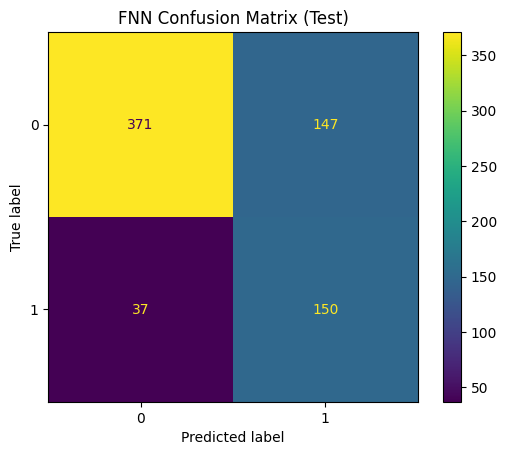

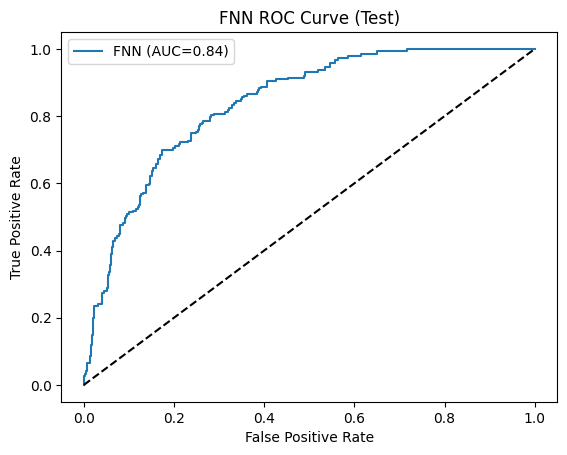

In [8]:
# Feed Forward Neural Network (FNN) with Optuna hyperparameter tuning (F1-based)
%pip install tensorflow-macos tensorflow-metal
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, losses, metrics
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, ConfusionMatrixDisplay, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt

# Deterministic TensorFlow config
tf.keras.utils.set_random_seed(SEED)
try:
    tf.config.experimental.enable_op_determinism()
except Exception:
    pass
tf.config.threading.set_intra_op_parallelism_threads(1)
tf.config.threading.set_inter_op_parallelism_threads(1)

# Compute class weights for imbalance
classes = np.unique(y_train)
class_weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)
class_weight_dict = dict(zip(classes, class_weights))

# Custom callback for validation F1 early stopping
class F1EarlyStopping(tf.keras.callbacks.Callback):
    def __init__(self, X_val, y_val, patience=5):
        super().__init__()
        self.X_val = X_val
        self.y_val = y_val
        self.patience = patience
        self.best_f1 = -1
        self.wait = 0
        self.best_weights = None
        self.stopped_epoch = None  # added to record stopping epoch
    def on_epoch_end(self, epoch, logs=None):
        preds = (self.model.predict(self.X_val, verbose=0).ravel() > 0.5).astype(int)
        current_f1 = f1_score(self.y_val, preds)
        if current_f1 > self.best_f1:
            self.best_f1 = current_f1
            self.best_weights = self.model.get_weights()
            self.wait = 0
        else:
            self.wait += 1
            if self.wait >= self.patience:
                self.stopped_epoch = epoch + 1
                print(f'Early stopping at epoch {self.stopped_epoch}; best val F1={self.best_f1:.4f}')
                self.model.stop_training = True

def create_fnn_model(trial):
    n_units = trial.suggest_int('n_units', 16, 128)
    lr = trial.suggest_float('lr', 1e-4, 1e-2, log=True)
    dropout = trial.suggest_float('dropout', 0.0, 0.5)
    model = models.Sequential([
        layers.Input(shape=(X_train_proc.shape[1],)),
        layers.Dense(n_units, activation='relu'),
        layers.Dropout(dropout),
        layers.Dense(1, activation='sigmoid')
    ])
    optimizer = optimizers.Adam(learning_rate=lr)
    model.compile(optimizer=optimizer, loss=losses.BinaryCrossentropy(), metrics=['accuracy'])
    return model

def objective_fnn(trial):
    model = create_fnn_model(trial)
    f1_callback = F1EarlyStopping(X_val_proc, y_val, patience=5)
    model.fit(
        X_train_proc, y_train,
        validation_data=(X_val_proc, y_val),
        epochs=30,
        batch_size=trial.suggest_int('batch_size', 32, 128),
        verbose=0,
        class_weight=class_weight_dict,
        callbacks=[f1_callback]
    )
    if f1_callback.stopped_epoch is not None:
        print(f'Trial early stopped at epoch {f1_callback.stopped_epoch} (best val F1={f1_callback.best_f1:.4f})')
    if f1_callback.best_weights is not None:
        model.set_weights(f1_callback.best_weights)
    return f1_callback.best_f1  # maximize F1

study_fnn = optuna.create_study(direction='maximize', sampler=optuna.samplers.TPESampler(seed=SEED))
study_fnn.optimize(objective_fnn, n_trials=50, show_progress_bar=True)

# Train best FNN model with best params
best_params_fnn = study_fnn.best_params
print('Best FNN hyperparameters:', best_params_fnn)
best_fnn = create_fnn_model(optuna.trial.FixedTrial(best_params_fnn))
f1_callback_final = F1EarlyStopping(X_val_proc, y_val, patience=5)
best_fnn.fit(
    X_train_proc, y_train,
    validation_data=(X_val_proc, y_val),
    epochs=30,
    batch_size=best_params_fnn['batch_size'],
    verbose=0,
    class_weight=class_weight_dict,
    callbacks=[f1_callback_final]
)
if f1_callback_final.stopped_epoch is not None:
    print(f'Final FNN early stopped at epoch {f1_callback_final.stopped_epoch} (best val F1={f1_callback_final.best_f1:.4f})')
if f1_callback_final.best_weights is not None:
    best_fnn.set_weights(f1_callback_final.best_weights)

# Evaluate on test set
pred_test_fnn = best_fnn.predict(X_test_proc).ravel()
pred_test_label_fnn = (pred_test_fnn > 0.5).astype(int)
cm_fnn = confusion_matrix(y_test, pred_test_label_fnn)
roc_auc_fnn = roc_auc_score(y_test, pred_test_fnn)
f1_fnn = f1_score(y_test, pred_test_label_fnn)
precision_fnn = precision_score(y_test, pred_test_label_fnn)
recall_fnn = recall_score(y_test, pred_test_label_fnn)
specificity_fnn = cm_fnn[0,0] / (cm_fnn[0,0] + cm_fnn[0,1]) if (cm_fnn[0,0] + cm_fnn[0,1]) > 0 else 0
accuracy_fnn = (cm_fnn[0,0] + cm_fnn[1,1]) / cm_fnn.sum()

print('FNN Test Results:')
print(f'Accuracy: {accuracy_fnn:.4f}')
print(f'F1 Score: {f1_fnn:.4f}')
print(f'Precision: {precision_fnn:.4f}')
print(f'Recall (Sensitivity): {recall_fnn:.4f}')
print(f'Specificity: {specificity_fnn:.4f}')
print(f'AUC: {roc_auc_fnn:.4f}')

ConfusionMatrixDisplay(cm_fnn).plot()
plt.title('FNN Confusion Matrix (Test)')
plt.show()

fpr_fnn, tpr_fnn, _ = roc_curve(y_test, pred_test_fnn)
plt.figure()
plt.plot(fpr_fnn, tpr_fnn, label=f'FNN (AUC={roc_auc_fnn:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('FNN ROC Curve (Test)')
plt.legend()
plt.show()


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


/Users/shreyasshah/Desktop/Fall_2025/STA 221/ecs221/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
[I 2025-11-21 18:35:10,039] A new study created in memory with name: no-name-9b31d142-0a0c-401e-ac32-811bceae0948
  0%|          | 0/50 [00:00<?, ?it/s]2025-11-21 18:35:10.061894: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2025-11-21 18:35:10.061932: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2025-11-21 18:35:10.061941: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2025-11-21 18:35:10.061960: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-11-21 18

Early stopping at epoch 14; best val F1=0.6429
Trial early stopped at epoch 14 (best val F1=0.6429)
[I 2025-11-21 18:35:39,638] Trial 0 finished with value: 0.6428571428571429 and parameters: {'n_layers': 3, 'n_units': 124, 'lr': 0.0029106359131330704, 'dropout': 0.2993292420985183, 'batch_size': 47}. Best is trial 0 with value: 0.6428571428571429.


Best trial: 0. Best value: 0.642857:   4%|▍         | 2/50 [00:39<14:16, 17.85s/it]

Early stopping at epoch 8; best val F1=0.6410
Trial early stopped at epoch 8 (best val F1=0.6410)
[I 2025-11-21 18:35:49,272] Trial 1 finished with value: 0.640973630831643 and parameters: {'n_layers': 2, 'n_units': 37, 'lr': 0.005399484409787433, 'dropout': 0.3005575058716044, 'batch_size': 100}. Best is trial 0 with value: 0.6428571428571429.


Best trial: 0. Best value: 0.642857:   6%|▌         | 3/50 [01:02<15:57, 20.37s/it]

Early stopping at epoch 12; best val F1=0.6333
Trial early stopped at epoch 12 (best val F1=0.6333)
[I 2025-11-21 18:36:12,630] Trial 2 finished with value: 0.6333333333333333 and parameters: {'n_layers': 2, 'n_units': 126, 'lr': 0.004622589001020831, 'dropout': 0.10616955533913808, 'batch_size': 49}. Best is trial 0 with value: 0.6428571428571429.


Best trial: 0. Best value: 0.642857:   8%|▊         | 4/50 [01:21<15:09, 19.78s/it]

Early stopping at epoch 12; best val F1=0.6411
Trial early stopped at epoch 12 (best val F1=0.6411)
[I 2025-11-21 18:36:31,513] Trial 3 finished with value: 0.6411290322580645 and parameters: {'n_layers': 2, 'n_units': 61, 'lr': 0.0011207606211860567, 'dropout': 0.21597250932105788, 'batch_size': 60}. Best is trial 0 with value: 0.6428571428571429.


Best trial: 4. Best value: 0.647658:  10%|█         | 5/50 [01:42<15:02, 20.06s/it]

Early stopping at epoch 13; best val F1=0.6477
Trial early stopped at epoch 13 (best val F1=0.6477)
[I 2025-11-21 18:36:52,066] Trial 4 finished with value: 0.6476578411405295 and parameters: {'n_layers': 3, 'n_units': 45, 'lr': 0.0003839629299804173, 'dropout': 0.18318092164684585, 'batch_size': 76}. Best is trial 4 with value: 0.6476578411405295.


Best trial: 4. Best value: 0.647658:  12%|█▏        | 6/50 [02:25<20:30, 27.97s/it]

Early stopping at epoch 13; best val F1=0.6410
Trial early stopped at epoch 13 (best val F1=0.6410)
[I 2025-11-21 18:37:35,398] Trial 5 finished with value: 0.640973630831643 and parameters: {'n_layers': 4, 'n_units': 51, 'lr': 0.0010677482709481358, 'dropout': 0.29620728443102123, 'batch_size': 36}. Best is trial 4 with value: 0.6476578411405295.


Best trial: 4. Best value: 0.647658:  14%|█▍        | 7/50 [02:56<20:43, 28.93s/it]

[I 2025-11-21 18:38:06,301] Trial 6 finished with value: 0.6257668711656442 and parameters: {'n_layers': 3, 'n_units': 48, 'lr': 0.00013492834268013249, 'dropout': 0.4744427686266666, 'batch_size': 125}. Best is trial 4 with value: 0.6476578411405295.


Best trial: 4. Best value: 0.647658:  16%|█▌        | 8/50 [03:23<19:57, 28.50s/it]

Early stopping at epoch 14; best val F1=0.6290
Trial early stopped at epoch 14 (best val F1=0.6290)
[I 2025-11-21 18:38:33,895] Trial 7 finished with value: 0.6290322580645161 and parameters: {'n_layers': 4, 'n_units': 61, 'lr': 0.0001567993391672301, 'dropout': 0.34211651325607845, 'batch_size': 74}. Best is trial 4 with value: 0.6476578411405295.


Best trial: 4. Best value: 0.647658:  18%|█▊        | 9/50 [03:47<18:25, 26.96s/it]

Early stopping at epoch 14; best val F1=0.6339
Trial early stopped at epoch 14 (best val F1=0.6339)
[I 2025-11-21 18:38:57,460] Trial 8 finished with value: 0.6339468302658486 and parameters: {'n_layers': 2, 'n_units': 80, 'lr': 0.00011715937392307068, 'dropout': 0.45466020103939103, 'batch_size': 57}. Best is trial 4 with value: 0.6476578411405295.


Best trial: 4. Best value: 0.647658:  20%|██        | 10/50 [04:06<16:17, 24.45s/it]

Early stopping at epoch 7; best val F1=0.6337
Trial early stopped at epoch 7 (best val F1=0.6337)
[I 2025-11-21 18:39:16,273] Trial 9 finished with value: 0.6336633663366337 and parameters: {'n_layers': 3, 'n_units': 62, 'lr': 0.001096821720752952, 'dropout': 0.2733551396716398, 'batch_size': 49}. Best is trial 4 with value: 0.6476578411405295.


Best trial: 4. Best value: 0.647658:  22%|██▏       | 11/50 [04:21<14:08, 21.74s/it]

Early stopping at epoch 8; best val F1=0.6333
Trial early stopped at epoch 8 (best val F1=0.6333)
[I 2025-11-21 18:39:31,894] Trial 10 finished with value: 0.6332665330661322 and parameters: {'n_layers': 4, 'n_units': 99, 'lr': 0.0003266202687419729, 'dropout': 0.0089809378074098, 'batch_size': 94}. Best is trial 4 with value: 0.6476578411405295.


Best trial: 4. Best value: 0.647658:  24%|██▍       | 12/50 [04:34<12:04, 19.06s/it]

Early stopping at epoch 6; best val F1=0.6316
Trial early stopped at epoch 6 (best val F1=0.6316)
[I 2025-11-21 18:39:44,829] Trial 11 finished with value: 0.631578947368421 and parameters: {'n_layers': 3, 'n_units': 126, 'lr': 0.0026612643350473874, 'dropout': 0.16739758811161823, 'batch_size': 79}. Best is trial 4 with value: 0.6476578411405295.


Best trial: 4. Best value: 0.647658:  26%|██▌       | 13/50 [04:56<12:19, 19.99s/it]

Early stopping at epoch 12; best val F1=0.6410
Trial early stopped at epoch 12 (best val F1=0.6410)
[I 2025-11-21 18:40:06,956] Trial 12 finished with value: 0.640973630831643 and parameters: {'n_layers': 3, 'n_units': 102, 'lr': 0.000457545668468221, 'dropout': 0.3674637024294079, 'batch_size': 95}. Best is trial 4 with value: 0.6476578411405295.


Best trial: 4. Best value: 0.647658:  28%|██▊       | 14/50 [05:29<14:21, 23.94s/it]

Early stopping at epoch 10; best val F1=0.6460
Trial early stopped at epoch 10 (best val F1=0.6460)
[I 2025-11-21 18:40:40,022] Trial 13 finished with value: 0.6459627329192547 and parameters: {'n_layers': 3, 'n_units': 87, 'lr': 0.002213441220758151, 'dropout': 0.13349553647268478, 'batch_size': 34}. Best is trial 4 with value: 0.6476578411405295.


Best trial: 4. Best value: 0.647658:  30%|███       | 15/50 [05:43<12:03, 20.66s/it]

Early stopping at epoch 7; best val F1=0.6322
Trial early stopped at epoch 7 (best val F1=0.6322)
[I 2025-11-21 18:40:53,072] Trial 14 finished with value: 0.6322067594433399 and parameters: {'n_layers': 3, 'n_units': 83, 'lr': 0.00047124484034455013, 'dropout': 0.10831931176716718, 'batch_size': 123}. Best is trial 4 with value: 0.6476578411405295.


Best trial: 4. Best value: 0.647658:  32%|███▏      | 16/50 [06:23<15:04, 26.60s/it]

Early stopping at epoch 10; best val F1=0.6050
Trial early stopped at epoch 10 (best val F1=0.6050)
[I 2025-11-21 18:41:33,476] Trial 15 finished with value: 0.6049661399548533 and parameters: {'n_layers': 4, 'n_units': 80, 'lr': 0.009818226878189128, 'dropout': 0.03923119248339044, 'batch_size': 32}. Best is trial 4 with value: 0.6476578411405295.


Best trial: 4. Best value: 0.647658:  34%|███▍      | 17/50 [06:42<13:25, 24.40s/it]

Early stopping at epoch 8; best val F1=0.6420
Trial early stopped at epoch 8 (best val F1=0.6420)
[I 2025-11-21 18:41:52,761] Trial 16 finished with value: 0.6419753086419753 and parameters: {'n_layers': 3, 'n_units': 96, 'lr': 0.0018766870441105819, 'dropout': 0.1834224163253534, 'batch_size': 69}. Best is trial 4 with value: 0.6476578411405295.


Best trial: 17. Best value: 0.650104:  36%|███▌      | 18/50 [07:03<12:24, 23.28s/it]

Early stopping at epoch 17; best val F1=0.6501
Trial early stopped at epoch 17 (best val F1=0.6501)
[I 2025-11-21 18:42:13,419] Trial 17 finished with value: 0.650103519668737 and parameters: {'n_layers': 2, 'n_units': 33, 'lr': 0.0002674701807186936, 'dropout': 0.10599787980404872, 'batch_size': 111}. Best is trial 17 with value: 0.650103519668737.


Best trial: 17. Best value: 0.650104:  38%|███▊      | 19/50 [07:29<12:26, 24.09s/it]

Early stopping at epoch 24; best val F1=0.6420
Trial early stopped at epoch 24 (best val F1=0.6420)
[I 2025-11-21 18:42:39,392] Trial 18 finished with value: 0.6419753086419753 and parameters: {'n_layers': 2, 'n_units': 33, 'lr': 0.00032531486163681056, 'dropout': 0.06120098872730465, 'batch_size': 111}. Best is trial 17 with value: 0.650103519668737.


Best trial: 17. Best value: 0.650104:  40%|████      | 20/50 [08:07<14:12, 28.41s/it]

[I 2025-11-21 18:43:17,893] Trial 19 finished with value: 0.6448979591836734 and parameters: {'n_layers': 2, 'n_units': 45, 'lr': 0.00021181449611920242, 'dropout': 0.22422753680801868, 'batch_size': 87}. Best is trial 17 with value: 0.650103519668737.


Best trial: 17. Best value: 0.650104:  42%|████▏     | 21/50 [08:24<11:58, 24.76s/it]

Early stopping at epoch 12; best val F1=0.6465
Trial early stopped at epoch 12 (best val F1=0.6465)
[I 2025-11-21 18:43:34,141] Trial 20 finished with value: 0.6464646464646465 and parameters: {'n_layers': 2, 'n_units': 68, 'lr': 0.0005864337002788755, 'dropout': 0.07173497793166263, 'batch_size': 107}. Best is trial 17 with value: 0.650103519668737.


Best trial: 17. Best value: 0.650104:  44%|████▍     | 22/50 [08:37<09:58, 21.37s/it]

Early stopping at epoch 8; best val F1=0.6437
Trial early stopped at epoch 8 (best val F1=0.6437)
[I 2025-11-21 18:43:47,598] Trial 21 finished with value: 0.6437246963562753 and parameters: {'n_layers': 2, 'n_units': 66, 'lr': 0.0006053733716504884, 'dropout': 0.07402611080183517, 'batch_size': 110}. Best is trial 17 with value: 0.650103519668737.


Best trial: 22. Best value: 0.650407:  46%|████▌     | 23/50 [09:00<09:53, 21.97s/it]

Early stopping at epoch 20; best val F1=0.6504
Trial early stopped at epoch 20 (best val F1=0.6504)
[I 2025-11-21 18:44:10,959] Trial 22 finished with value: 0.6504065040650406 and parameters: {'n_layers': 2, 'n_units': 70, 'lr': 0.0002607339892223665, 'dropout': 0.1489880901977568, 'batch_size': 111}. Best is trial 22 with value: 0.6504065040650406.


Best trial: 22. Best value: 0.650407:  48%|████▊     | 24/50 [09:23<09:39, 22.29s/it]

Early stopping at epoch 16; best val F1=0.6424
Trial early stopped at epoch 16 (best val F1=0.6424)
[I 2025-11-21 18:44:34,008] Trial 23 finished with value: 0.6424242424242425 and parameters: {'n_layers': 2, 'n_units': 40, 'lr': 0.00022476915941092388, 'dropout': 0.16374529382141045, 'batch_size': 86}. Best is trial 22 with value: 0.6504065040650406.


Best trial: 22. Best value: 0.650407:  50%|█████     | 25/50 [09:42<08:45, 21.02s/it]

Early stopping at epoch 14; best val F1=0.6314
Trial early stopped at epoch 14 (best val F1=0.6314)
[I 2025-11-21 18:44:52,052] Trial 24 finished with value: 0.6313645621181263 and parameters: {'n_layers': 2, 'n_units': 53, 'lr': 0.00026637730203291754, 'dropout': 0.20405646601312277, 'batch_size': 119}. Best is trial 22 with value: 0.6504065040650406.


Best trial: 22. Best value: 0.650407:  52%|█████▏    | 26/50 [09:56<07:36, 19.03s/it]

Early stopping at epoch 9; best val F1=0.6432
Trial early stopped at epoch 9 (best val F1=0.6432)
[I 2025-11-21 18:45:06,450] Trial 25 finished with value: 0.6431535269709544 and parameters: {'n_layers': 2, 'n_units': 32, 'lr': 0.000702890328644486, 'dropout': 0.11640883144389577, 'batch_size': 117}. Best is trial 22 with value: 0.6504065040650406.


Best trial: 22. Best value: 0.650407:  54%|█████▍    | 27/50 [10:25<08:28, 22.12s/it]

Early stopping at epoch 24; best val F1=0.6504
Trial early stopped at epoch 24 (best val F1=0.6504)
[I 2025-11-21 18:45:35,771] Trial 26 finished with value: 0.6504065040650406 and parameters: {'n_layers': 2, 'n_units': 71, 'lr': 0.00037458890046542274, 'dropout': 0.2494266740628801, 'batch_size': 100}. Best is trial 22 with value: 0.6504065040650406.


Best trial: 22. Best value: 0.650407:  56%|█████▌    | 28/50 [10:56<09:04, 24.76s/it]

Early stopping at epoch 23; best val F1=0.6408
Trial early stopped at epoch 23 (best val F1=0.6408)
[I 2025-11-21 18:46:06,680] Trial 27 finished with value: 0.6408163265306123 and parameters: {'n_layers': 2, 'n_units': 73, 'lr': 0.00019179288646626328, 'dropout': 0.2433963791282262, 'batch_size': 103}. Best is trial 22 with value: 0.6504065040650406.


Best trial: 22. Best value: 0.650407:  58%|█████▊    | 29/50 [11:19<08:25, 24.09s/it]

Early stopping at epoch 20; best val F1=0.6440
Trial early stopped at epoch 20 (best val F1=0.6440)
[I 2025-11-21 18:46:29,226] Trial 28 finished with value: 0.644 and parameters: {'n_layers': 2, 'n_units': 74, 'lr': 0.0008189834975520498, 'dropout': 0.14313739645744697, 'batch_size': 128}. Best is trial 22 with value: 0.6504065040650406.


Best trial: 22. Best value: 0.650407:  60%|██████    | 30/50 [11:40<07:47, 23.38s/it]

Early stopping at epoch 17; best val F1=0.6329
Trial early stopped at epoch 17 (best val F1=0.6329)
[I 2025-11-21 18:46:50,953] Trial 29 finished with value: 0.6328600405679513 and parameters: {'n_layers': 2, 'n_units': 116, 'lr': 0.00010549744050522142, 'dropout': 0.3928978007901144, 'batch_size': 116}. Best is trial 22 with value: 0.6504065040650406.


Best trial: 22. Best value: 0.650407:  62%|██████▏   | 31/50 [11:59<06:58, 22.03s/it]

Early stopping at epoch 12; best val F1=0.6410
Trial early stopped at epoch 12 (best val F1=0.6410)
[I 2025-11-21 18:47:09,820] Trial 30 finished with value: 0.640973630831643 and parameters: {'n_layers': 2, 'n_units': 108, 'lr': 0.00027185709715916447, 'dropout': 0.0006610447414064358, 'batch_size': 92}. Best is trial 22 with value: 0.6504065040650406.


Best trial: 22. Best value: 0.650407:  64%|██████▍   | 32/50 [12:18<06:18, 21.01s/it]

Early stopping at epoch 9; best val F1=0.6327
Trial early stopped at epoch 9 (best val F1=0.6327)
[I 2025-11-21 18:47:28,465] Trial 31 finished with value: 0.6326530612244898 and parameters: {'n_layers': 3, 'n_units': 55, 'lr': 0.0004190156427619333, 'dropout': 0.2669152736777535, 'batch_size': 101}. Best is trial 22 with value: 0.6504065040650406.


Best trial: 22. Best value: 0.650407:  66%|██████▌   | 33/50 [12:52<07:05, 25.03s/it]

Early stopping at epoch 21; best val F1=0.6488
Trial early stopped at epoch 21 (best val F1=0.6488)
[I 2025-11-21 18:48:02,863] Trial 32 finished with value: 0.6487603305785123 and parameters: {'n_layers': 2, 'n_units': 41, 'lr': 0.00036446390832397244, 'dropout': 0.18347427366485458, 'batch_size': 67}. Best is trial 22 with value: 0.6504065040650406.


Best trial: 22. Best value: 0.650407:  68%|██████▊   | 34/50 [13:40<08:30, 31.90s/it]

[I 2025-11-21 18:48:50,779] Trial 33 finished with value: 0.6363636363636364 and parameters: {'n_layers': 2, 'n_units': 38, 'lr': 0.00016746442224753054, 'dropout': 0.14767022885322698, 'batch_size': 65}. Best is trial 22 with value: 0.6504065040650406.


Best trial: 22. Best value: 0.650407:  70%|███████   | 35/50 [13:57<06:48, 27.27s/it]

Early stopping at epoch 7; best val F1=0.6413
Trial early stopped at epoch 7 (best val F1=0.6413)
[I 2025-11-21 18:49:07,242] Trial 34 finished with value: 0.6412825651302605 and parameters: {'n_layers': 2, 'n_units': 89, 'lr': 0.0015271594038959177, 'dropout': 0.2072958782974687, 'batch_size': 106}. Best is trial 22 with value: 0.6504065040650406.


Best trial: 22. Best value: 0.650407:  72%|███████▏  | 36/50 [14:28<06:39, 28.52s/it]

Early stopping at epoch 20; best val F1=0.6392
Trial early stopped at epoch 20 (best val F1=0.6392)
[I 2025-11-21 18:49:38,674] Trial 35 finished with value: 0.6391752577319587 and parameters: {'n_layers': 2, 'n_units': 57, 'lr': 0.00029370731681660776, 'dropout': 0.31875252942917176, 'batch_size': 85}. Best is trial 22 with value: 0.6504065040650406.


Best trial: 22. Best value: 0.650407:  74%|███████▍  | 37/50 [14:53<05:56, 27.45s/it]

Early stopping at epoch 16; best val F1=0.6461
Trial early stopped at epoch 16 (best val F1=0.6461)
[I 2025-11-21 18:50:03,655] Trial 36 finished with value: 0.6460905349794238 and parameters: {'n_layers': 2, 'n_units': 43, 'lr': 0.0005270230622744274, 'dropout': 0.23971183679193564, 'batch_size': 113}. Best is trial 22 with value: 0.6504065040650406.


Best trial: 22. Best value: 0.650407:  76%|███████▌  | 38/50 [15:18<05:20, 26.73s/it]

Early stopping at epoch 12; best val F1=0.6475
Trial early stopped at epoch 12 (best val F1=0.6475)
[I 2025-11-21 18:50:28,698] Trial 37 finished with value: 0.6475409836065574 and parameters: {'n_layers': 2, 'n_units': 74, 'lr': 0.00038215120842737096, 'dropout': 0.09600492688201849, 'batch_size': 97}. Best is trial 22 with value: 0.6504065040650406.


Best trial: 22. Best value: 0.650407:  78%|███████▊  | 39/50 [15:40<04:39, 25.38s/it]

Early stopping at epoch 16; best val F1=0.6466
Trial early stopped at epoch 16 (best val F1=0.6466)
[I 2025-11-21 18:50:50,934] Trial 38 finished with value: 0.6465863453815262 and parameters: {'n_layers': 2, 'n_units': 47, 'lr': 0.0008530458652705503, 'dropout': 0.18257033403934247, 'batch_size': 120}. Best is trial 22 with value: 0.6504065040650406.


Best trial: 22. Best value: 0.650407:  80%|████████  | 40/50 [16:34<05:39, 33.98s/it]

[I 2025-11-21 18:51:44,984] Trial 39 finished with value: 0.6418219461697723 and parameters: {'n_layers': 2, 'n_units': 69, 'lr': 0.00014570333081825163, 'dropout': 0.28577054153180825, 'batch_size': 56}. Best is trial 22 with value: 0.6504065040650406.


Best trial: 40. Best value: 0.651546:  82%|████████▏ | 41/50 [17:19<05:34, 37.15s/it]

[I 2025-11-21 18:52:29,514] Trial 40 finished with value: 0.6515463917525773 and parameters: {'n_layers': 2, 'n_units': 38, 'lr': 0.00022533731772642112, 'dropout': 0.09129693476431353, 'batch_size': 74}. Best is trial 40 with value: 0.6515463917525773.


Best trial: 40. Best value: 0.651546:  84%|████████▍ | 42/50 [17:55<04:55, 36.90s/it]

Early stopping at epoch 21; best val F1=0.6311
Trial early stopped at epoch 21 (best val F1=0.6311)
[I 2025-11-21 18:53:05,829] Trial 41 finished with value: 0.6311475409836066 and parameters: {'n_layers': 2, 'n_units': 39, 'lr': 0.0002026027849173158, 'dropout': 0.09498354772624765, 'batch_size': 71}. Best is trial 40 with value: 0.6515463917525773.


Best trial: 40. Best value: 0.651546:  86%|████████▌ | 43/50 [18:32<04:17, 36.82s/it]

Early stopping at epoch 20; best val F1=0.6437
Trial early stopped at epoch 20 (best val F1=0.6437)
[I 2025-11-21 18:53:42,470] Trial 42 finished with value: 0.6437246963562753 and parameters: {'n_layers': 2, 'n_units': 50, 'lr': 0.00024186786376312048, 'dropout': 0.044824927855754246, 'batch_size': 66}. Best is trial 40 with value: 0.6515463917525773.


Best trial: 43. Best value: 0.652977:  88%|████████▊ | 44/50 [19:20<04:00, 40.13s/it]

Early stopping at epoch 19; best val F1=0.6530
Trial early stopped at epoch 19 (best val F1=0.6530)
[I 2025-11-21 18:54:30,309] Trial 43 finished with value: 0.6529774127310062 and parameters: {'n_layers': 2, 'n_units': 35, 'lr': 0.0003435373595360418, 'dropout': 0.13001258720867756, 'batch_size': 42}. Best is trial 43 with value: 0.6529774127310062.


Best trial: 43. Best value: 0.652977:  90%|█████████ | 45/50 [20:08<03:32, 42.44s/it]

Early stopping at epoch 20; best val F1=0.6466
Trial early stopped at epoch 20 (best val F1=0.6466)
[I 2025-11-21 18:55:18,152] Trial 44 finished with value: 0.6465863453815262 and parameters: {'n_layers': 2, 'n_units': 35, 'lr': 0.0001779326670126293, 'dropout': 0.026455843801402867, 'batch_size': 45}. Best is trial 43 with value: 0.6529774127310062.


Best trial: 43. Best value: 0.652977:  92%|█████████▏| 46/50 [21:04<03:06, 46.70s/it]

Early stopping at epoch 22; best val F1=0.6491
Trial early stopped at epoch 22 (best val F1=0.6491)
[I 2025-11-21 18:56:14,778] Trial 45 finished with value: 0.6490872210953347 and parameters: {'n_layers': 2, 'n_units': 60, 'lr': 0.0002950972863325035, 'dropout': 0.12955130064746517, 'batch_size': 42}. Best is trial 43 with value: 0.6529774127310062.


Best trial: 43. Best value: 0.652977:  94%|█████████▍| 47/50 [23:29<03:48, 76.04s/it]

Early stopping at epoch 21; best val F1=0.6445
Trial early stopped at epoch 21 (best val F1=0.6445)
[I 2025-11-21 18:58:39,295] Trial 46 finished with value: 0.6444906444906445 and parameters: {'n_layers': 2, 'n_units': 36, 'lr': 0.00014608051756401827, 'dropout': 0.11604897365072465, 'batch_size': 99}. Best is trial 43 with value: 0.6529774127310062.


Best trial: 43. Best value: 0.652977:  96%|█████████▌| 48/50 [24:30<02:23, 71.74s/it]

Early stopping at epoch 28; best val F1=0.6356
Trial early stopped at epoch 28 (best val F1=0.6356)
[I 2025-11-21 18:59:40,988] Trial 47 finished with value: 0.6356275303643725 and parameters: {'n_layers': 4, 'n_units': 32, 'lr': 0.00012864680267143626, 'dropout': 0.08292471760827518, 'batch_size': 90}. Best is trial 43 with value: 0.6529774127310062.


Best trial: 43. Best value: 0.652977:  98%|█████████▊| 49/50 [25:16<01:03, 63.92s/it]

Early stopping at epoch 9; best val F1=0.6293
Trial early stopped at epoch 9 (best val F1=0.6293)
[I 2025-11-21 19:00:26,659] Trial 48 finished with value: 0.6292585170340681 and parameters: {'n_layers': 3, 'n_units': 48, 'lr': 0.00043829231949494754, 'dropout': 0.16048498508782566, 'batch_size': 40}. Best is trial 43 with value: 0.6529774127310062.


Best trial: 43. Best value: 0.652977: 100%|██████████| 50/50 [29:07<00:00, 34.95s/it] 

Early stopping at epoch 14; best val F1=0.6407
Trial early stopped at epoch 14 (best val F1=0.6407)
[I 2025-11-21 19:04:17,425] Trial 49 finished with value: 0.6406570841889117 and parameters: {'n_layers': 2, 'n_units': 92, 'lr': 0.00034409758623006365, 'dropout': 0.4134086060111548, 'batch_size': 52}. Best is trial 43 with value: 0.6529774127310062.
Best MLP hyperparameters: {'n_layers': 2, 'n_units': 35, 'lr': 0.0003435373595360418, 'dropout': 0.13001258720867756, 'batch_size': 42}


Early stopping at epoch 17; best val F1=0.6405
Final MLP early stopped at epoch 17 (best val F1=0.6405)
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
MLP Test Results:
Accuracy: 0.7390
F1 Score: 0.6118
Precision: 0.5052
Recall (Sensitivity): 0.7754
Specificity: 0.7259
AUC: 0.8374


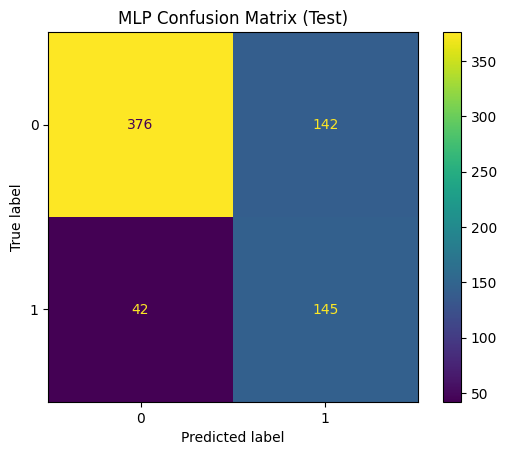

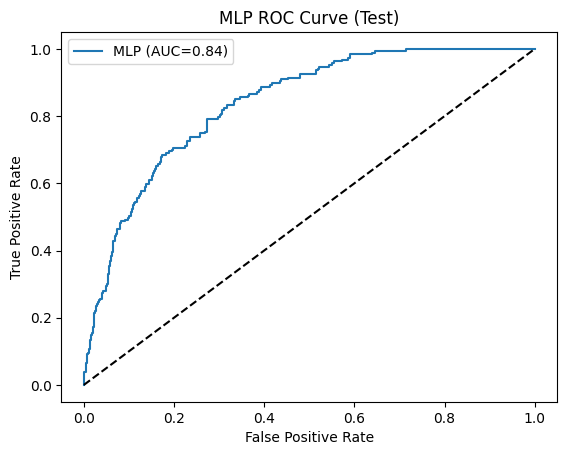

In [8]:
# Multi-Layer Perceptron (MLP) with Optuna hyperparameter tuning (F1-based)
# F1EarlyStopping already defined in previous cell
%pip install tensorflow-macos tensorflow-metal
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, losses, metrics
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, ConfusionMatrixDisplay, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt

# Deterministic TensorFlow config
tf.keras.utils.set_random_seed(SEED)
try:
    tf.config.experimental.enable_op_determinism()
except Exception:
    pass
tf.config.threading.set_intra_op_parallelism_threads(1)
tf.config.threading.set_inter_op_parallelism_threads(1)

# Compute class weights for imbalance
classes = np.unique(y_train)
class_weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)
class_weight_dict = dict(zip(classes, class_weights))

# Custom callback for validation F1 early stopping
class F1EarlyStopping(tf.keras.callbacks.Callback):
    def __init__(self, X_val, y_val, patience=5):
        super().__init__()
        self.X_val = X_val
        self.y_val = y_val
        self.patience = patience
        self.best_f1 = -1
        self.wait = 0
        self.best_weights = None
        self.stopped_epoch = None  # added to record stopping epoch
    def on_epoch_end(self, epoch, logs=None):
        preds = (self.model.predict(self.X_val, verbose=0).ravel() > 0.5).astype(int)
        current_f1 = f1_score(self.y_val, preds)
        if current_f1 > self.best_f1:
            self.best_f1 = current_f1
            self.best_weights = self.model.get_weights()
            self.wait = 0
        else:
            self.wait += 1
            if self.wait >= self.patience:
                self.stopped_epoch = epoch + 1
                print(f'Early stopping at epoch {self.stopped_epoch}; best val F1={self.best_f1:.4f}')
                self.model.stop_training = True
                
def create_mlp_model(trial):
    n_layers = trial.suggest_int('n_layers', 2, 4)
    n_units = trial.suggest_int('n_units', 32, 128)
    lr = trial.suggest_float('lr', 1e-4, 1e-2, log=True)
    dropout = trial.suggest_float('dropout', 0.0, 0.5)
    model = models.Sequential()
    model.add(layers.Input(shape=(X_train_proc.shape[1],)))
    for _ in range(n_layers):
        model.add(layers.Dense(n_units, activation='relu'))
        model.add(layers.Dropout(dropout))
    model.add(layers.Dense(1, activation='sigmoid'))
    optimizer = optimizers.Adam(learning_rate=lr)
    model.compile(optimizer=optimizer, loss=losses.BinaryCrossentropy(), metrics=['accuracy'])
    return model

def objective_mlp(trial):
    model = create_mlp_model(trial)
    f1_callback = F1EarlyStopping(X_val_proc, y_val, patience=5)
    model.fit(
        X_train_proc, y_train,
        validation_data=(X_val_proc, y_val),
        epochs=30,
        batch_size=trial.suggest_int('batch_size', 32, 128),
        verbose=0,
        class_weight=class_weight_dict,
        callbacks=[f1_callback]
    )
    if f1_callback.stopped_epoch is not None:
        print(f'Trial early stopped at epoch {f1_callback.stopped_epoch} (best val F1={f1_callback.best_f1:.4f})')
    if f1_callback.best_weights is not None:
        model.set_weights(f1_callback.best_weights)
    return f1_callback.best_f1  # maximize F1

study_mlp = optuna.create_study(direction='maximize', sampler=optuna.samplers.TPESampler(seed=SEED))
study_mlp.optimize(objective_mlp, n_trials=50, show_progress_bar=True)

best_params_mlp = study_mlp.best_params
print('Best MLP hyperparameters:', best_params_mlp)
best_mlp = create_mlp_model(optuna.trial.FixedTrial(best_params_mlp))
f1_callback_final = F1EarlyStopping(X_val_proc, y_val, patience=5)
best_mlp.fit(
    X_train_proc, y_train,
    validation_data=(X_val_proc, y_val),
    epochs=30,
    batch_size=best_params_mlp['batch_size'],
    verbose=0,
    class_weight=class_weight_dict,
    callbacks=[f1_callback_final]
)
if f1_callback_final.stopped_epoch is not None:
    print(f'Final MLP early stopped at epoch {f1_callback_final.stopped_epoch} (best val F1={f1_callback_final.best_f1:.4f})')
if f1_callback_final.best_weights is not None:
    best_mlp.set_weights(f1_callback_final.best_weights)

# Evaluate on test set
pred_test_mlp = best_mlp.predict(X_test_proc).ravel()
pred_test_label_mlp = (pred_test_mlp > 0.5).astype(int)
cm_mlp = confusion_matrix(y_test, pred_test_label_mlp)
roc_auc_mlp = roc_auc_score(y_test, pred_test_mlp)
f1_mlp = f1_score(y_test, pred_test_label_mlp)
precision_mlp = precision_score(y_test, pred_test_label_mlp)
recall_mlp = recall_score(y_test, pred_test_label_mlp)
specificity_mlp = cm_mlp[0,0] / (cm_mlp[0,0] + cm_mlp[0,1]) if (cm_mlp[0,0] + cm_mlp[0,1]) > 0 else 0
accuracy_mlp = (cm_mlp[0,0] + cm_mlp[1,1]) / cm_mlp.sum()

print('MLP Test Results:')
print(f'Accuracy: {accuracy_mlp:.4f}')
print(f'F1 Score: {f1_mlp:.4f}')
print(f'Precision: {precision_mlp:.4f}')
print(f'Recall (Sensitivity): {recall_mlp:.4f}')
print(f'Specificity: {specificity_mlp:.4f}')
print(f'AUC: {roc_auc_mlp:.4f}')

ConfusionMatrixDisplay(cm_mlp).plot()
plt.title('MLP Confusion Matrix (Test)')
plt.show()

fpr_mlp, tpr_mlp, _ = roc_curve(y_test, pred_test_mlp)
plt.figure()
plt.plot(fpr_mlp, tpr_mlp, label=f'MLP (AUC={roc_auc_mlp:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('MLP ROC Curve (Test)')
plt.legend()
plt.show()